<a href="https://colab.research.google.com/github/dil150898/Hotel_booking_anylisys/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [93]:
# installing Klib library
!pip install klib

# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
file_path = ("/content/drive/MyDrive/Almabetter/Capstone Project/Exploratory Data Analysis/Hotel Booking Analysis/Dil khush Sharma/1 Hotel Bookings.csv")
df = pd.read_csv(file_path)

In [96]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [97]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [99]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [100]:
df.shape

(119390, 32)

In [101]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [102]:
df.isna().sum().sort_values(ascending = False)[:4]

company     112593
agent        16340
country        488
children         4
dtype: int64

In [103]:
df['country'].fillna('others' , inplace = True)
df['children'].fillna(0 , inplace = True)
df['agent'].fillna(0 , inplace = True)
df['company'].fillna(0 , inplace = True)

In [104]:
hotel_type = df["hotel"].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [105]:
df['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [106]:
df['agent'].value_counts()

9.0      31961
0.0      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

In [107]:
df['company'].value_counts()

0.0      112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: company, Length: 353, dtype: int64

In [108]:
"""percentage_of_data_having_availbility_0= round((len(df[df['availability_365']==0]['availability_365'])/len(df['availability_365']))*100,2)
print(f'The percentage of data having availability as 0 is {percentage_of_data_having_availbility_0} %')"""

"percentage_of_data_having_availbility_0= round((len(df[df['availability_365']==0]['availability_365'])/len(df['availability_365']))*100,2)\nprint(f'The percentage of data having availability as 0 is {percentage_of_data_having_availbility_0} %')"

In [109]:
df.isna().sum().sort_values(ascending = False)[:4]

hotel                        0
is_canceled                  0
reservation_status           0
total_of_special_requests    0
dtype: int64

In [110]:
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [111]:
df.drop_duplicates(inplace = True)

In [112]:
df.shape

(87396, 32)

In [113]:
df['total_people'] = df['adults'] + df['children'] + df['babies']

In [114]:
df['total_stays'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

## 1. Most prefered hotel

TypeError: ignored

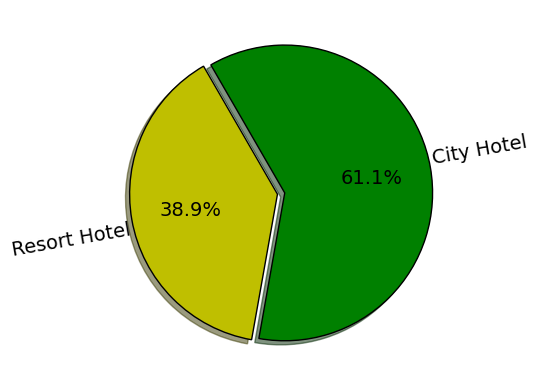

In [115]:
hotel_count = df.hotel.value_counts().sort_values(ascending=False).reset_index()
hotel_count.rename(columns = {'index' : 'Hotel_type' , 'hotel' : 'Hotel_counts'} , inplace = True)
explode = (0.05,0.0)
plt.pie(hotel_count["Hotel_counts"] , labels = hotel_count['Hotel_type'] , explode = explode , colors = ['g' , 'y'] ,
        autopct = '%0.1f%%' , radius = 1 , labeldistance = 1 , startangle = 120 , 
        textprops = {'fontsize' : 14} , counterclock = False , wedgeprops = {'linewidth' : 1 , 'edgecolor' : 'k'} , center = (0,0) , 
        rotatelabels = True , shadow = True)
plt.title ("hotel status")
plt.legend(loc = 2)
plt.show()

In [ ]:
df['is_canceled'].nunique()

In [ ]:
df['is_canceled'] = df['is_canceled'].replace([0 , 1] , ['not canceled' , 'canceled'])
cancelation_status = df.is_canceled.value_counts().reset_index()
cancelation_status.rename(columns = {'index' : 'status' , 'is_canceled' : 'is_canceled'} , inplace = True)
plt.pie(cancelation_status['is_canceled'] , labels = cancelation_status['status'] , shadow = True  , colors = ['g' , 'm'] ,rotatelabels = True , radius = 1 , autopct = '%0.1f%%' )
plt.pie([1] , colors = "w" , radius = 0.5)
plt.title('Hotel cancelation status')
plt.legend(loc = 1)
plt.show()

In [ ]:
df['is_repeated_guest'] = df['is_repeated_guest'].replace([0 , 1] , ['Not Repeated' , 'Repeated'])
guest_status = df.is_repeated_guest.value_counts().reset_index()
guest_status.rename(columns = {"index" : "status" , "is_repeated_guest" : "count"} , inplace = True)
plt.pie(guest_status["count"] ,explode = explode , labels = guest_status['status'] , colors = ['r' , 'y'] , shadow = True , rotatelabels = True , autopct = '%0.1f%%')
plt.title('Repeated Guest Status')
plt.legend(loc = 1)
plt.show()

In [ ]:
Customer_types = df.customer_type.value_counts().reset_index()
Customer_types.rename(columns = {"index" : "type" , "customer_type" : "total_count"} , inplace = True)
exp = (0.0 , 0.0 , 0.2 , 0.5)
plt.pie(Customer_types['total_count'] , labels = Customer_types['type'] , colors = ['c' , 'm' , 'b' , 'y'] , explode = exp , rotatelabels = True , autopct = "%0.1f%%" , textprops = {'fontsize' : 13} )
plt.title("Customer Types" )
plt.pie([1] , colors = 'w' , radius = 0.5)
plt.legend(loc = 3)
plt.show()

In [ ]:
deposit_type = df.deposit_type.value_counts().reset_index()
deposit_type.rename(columns = {"index" : "Deposit Type" , "deposit_type" : "count"} , inplace = True)
exp = (0.0 , 0.1 , 0.3)
plt.pie(deposit_type["count"] , labels = deposit_type["Deposit Type"] , shadow = True , wedgeprops = {'linewidth' : 0.5 , 'edgecolor' : 'g'} , colors = ['r' , 'y' , 'b'] , autopct = '%0.1f%%' , rotatelabels = True , radius = 1.2 ,explode = exp)
plt.pie([1] , colors = 'w' , radius = 0.6)
plt.title('Deposit type' , fontsize=13)
plt.legend(loc = 3)
plt.show()


## 2. Lets practice bar graph

In [ ]:
deposit_type = df.deposit_type.value_counts().reset_index()
deposit_type.rename(columns = {"index" : "Deposit Type" , "deposit_type" : "count"} , inplace = True)
exp = (0.0 , 0.1 , 0.3)
plt.xlabel = ("Types")
plt.ylabel = ("Status")
plt.title  = ("Deposit Type for Customer")
plt.bar(deposit_type["Deposit Type"] , deposit_type["count"] , width = 0.4)
plt.show()

In [ ]:
Customer_types = df.customer_type.value_counts().reset_index()
Customer_types.rename(columns = {"index" : "type" , "customer_type" : "total_count"} , inplace = True)
color = ['k' , 'm' , 'b' , 'g']
fig = plt.figure(figsize =(15, 5))
plt.bar(Customer_types['type'] , Customer_types['total_count'] , color = color , align = 'edge' , edgecolor = 'r' , linewidth = 5 , linestyle = ':' , alpha = 0.2 , 
        label = 'legend' , )
plt.legend = ()

plt.xlabel = (' types')
plt.ylabel = ('count')
plt.title = (' general count')
plt.show()